In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("ex2data2.txt",header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
data[3]=1
data[4]=data[0]**2
data[5]=data[0]*data[1]
data[6]=data[1]**2
data[7]=data[0]**3
data[8]=data[1]**3
data[9]=data[0]**2*data[1]
data[10]=data[0]*data[1]**2
data[11]=data[0]**4
data[12]=data[1]**4
data[13]=data[0]*data[1]**3
data[14]=data[0]**2*data[1]**2
data[15]=data[0]**3*data[1]
data[16]=data[0]**5
data[17]=data[1]**5
data[18]=data[0]*data[1]**4
data[19]=data[0]**4*data[1]
data[20]=data[0]**2*data[1]**3
data[21]=data[0]**3*data[1]**2
data[22]=data[0]**6
data[23]=data[1]**6
data[24]=data[0]*data[1]**5
data[25]=data[0]**5*data[1]
data[26]=data[0]**4*data[1]**2
data[27]=data[0]**2*data[1]**4
data[28]=data[0]**3*data[1]**3
data = np.array(data)

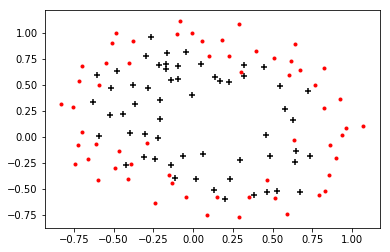

In [6]:
plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], c='black', marker='+')
plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], c='red', marker='.')

In [100]:
X=np.array([data[3], data[0],data[1],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18],data[19],data[20],data[21],data[22],data[23],data[24],data[25],data[26],data[27],data[28]])
y=data[2].reshape((1,-1))
X.shape, y.shape

((28, 29), (1, 29))

In [93]:
theta=np.zeros((1, 28))
theta.shape

(1, 28)

In [101]:
l = 1
def hypo(theta, X):
    sig = 1/(1+np.exp(-theta.dot(X)))
    return sig

def J(theta):
    m = y.shape[1]
    th = theta.reshape((1,-1))
    yp = hypo(th, X)
    cost = -np.mean(y*np.log(yp)+(1-y)*np.log(1-yp)) + np.sum(th**2.0)*l/(2*m) - th[0,0]**2/(2*m)
    return cost

def dJ(theta):
    m = y.shape[1]
    th = theta.reshape((1,-1))
    yp = hypo(th,X)
    err = yp - y
    d = (err.dot(X.T))/m + l*th/m
    d[0,0] = d[0,0] - l*th[0,0]/m
    return d.reshape((-1,))


In [102]:
theta = spo.fmin_cg(f=J,x0=theta.reshape((-1,)),fprime=dJ).reshape((1,-1))
theta

Optimization terminated successfully.
         Current function value: 0.563873
         Iterations: 37
         Function evaluations: 117
         Gradient evaluations: 117


array([[ 7.29719514e+00, -3.89535083e-01, -2.29547717e-01,
        -6.23502264e-04,  3.85262199e-02,  7.88081731e-02,
         1.04909099e-01,  1.04080713e-01,  9.48943955e-02,
         2.57668362e-02, -7.44039100e-02, -3.31999268e-01,
        -5.92889678e-01, -9.38478310e-01, -5.78397352e-01,
        -2.83309000e-01, -5.20290091e-01, -1.94036269e-01,
        -5.83340085e-02, -6.31648132e-02, -1.11328413e-02,
         3.89670129e-02,  1.00649794e-01,  1.16768575e-01,
         8.82186146e-02, -2.37540226e-02, -2.33583930e-01,
        -7.06071764e-02]])

(50, 50) (50, 50) (28,)
(50, 50)


/usr/lib/python3/dist-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


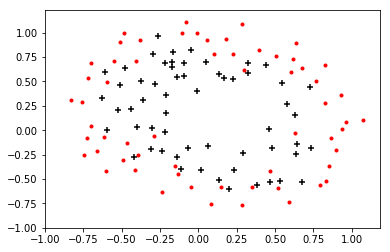

In [103]:
def plot_pts(data, theta):
    plt.scatter(data[data[:,2]==1][:,0], data[data[:,2]==1][:,1], c='black', marker='+')
    plt.scatter(data[data[:,2]==0][:,0], data[data[:,2]==0][:,1], c='red', marker='.')
    x1 = np.linspace(-1,1)
    x2 = np.linspace(-1,1)
    t = theta.flatten()
    x1, x2 = np.meshgrid(x1, x2)
    print(x1.shape, x2.shape, t.shape)
    z = t[1]*x1 + t[2]*x2+t[3]*x1**2 + t[4]*x1*x2 +t[5]*x2**2 +t[6]*x1**3 + t[7]*x2**3 + t[8]*x1**2*x2+\
    t[9]*x1*x2**2 +t[10]*x1**4 + t[11]*x2**4 + t[12]*x1*x2**3 + t[13]*x1**2*x2**2 + t[14]*x1**3*x2 + t[15]*x1**5\
    + t[16]*x2**5 + t[17]*x1*x2**4 + t[18]*x1**4*x2 + t[19]*x1**2*x2**3 + t[20]*x1**3*x2**2 + t[21]*x1**6 +\
    t[22]*x2**6+ t[23]*x1*x2**5 + t[24]*x1**5*x2 + t[25]*x1**4*x2**2 + t[26]*x1**2*x2**4 + t[27]*x1**3*x2**3
    print(z.shape)
    plt.contour(x1, x2, z, [-t[0]])

plot_pts(data, theta)